### Problem Statement & Business Case

Marketing is crucial for the growth and sustainability of any business. Marketers can help engage customers, grow revenue, build the company's brand and increase sales. One of the responsibilities of the marketers is to know customers and identify their needs. If there is enough data about customers, data science can be applied for market segmentation. In this case study, the bank has extensive data on their customers for the past 6 months. As a marketing team at the bank we will divide customers into at least 3 distinctive groups to launch a targetted ad marketing campaign.  <BR><br>
Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

### Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Marketing_data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Explanation of each independent features
1. CUSTID: Identification of Credit Card holder 
2. BALANCE: Balance amount left in customer's account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFFPURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
13. PURCHASES_TRX: Number of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user  
17. PRC_FULL_PAYMENT: Percent of full payment paid by user
18. TENURE: Tenure of credit card service for user

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Exploratory Data Analysis

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Fill up the missing values with mean of the MINIMUM_PAYMENTS and CREDIT_LIMIT

In [5]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [6]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [7]:
df['MINIMUM_PAYMENTS'].isnull().sum(), df['CREDIT_LIMIT'].isnull().sum()

(0, 0)

Let's check if we have duplicated entries in the data

In [8]:
df.duplicated().sum()

0

Let's drop Customer ID since it has no meaning here 

In [9]:
df.drop("CUST_ID", axis = 1, inplace= True)

In [10]:
n = len(df.columns)
n

17

In [11]:
print(df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


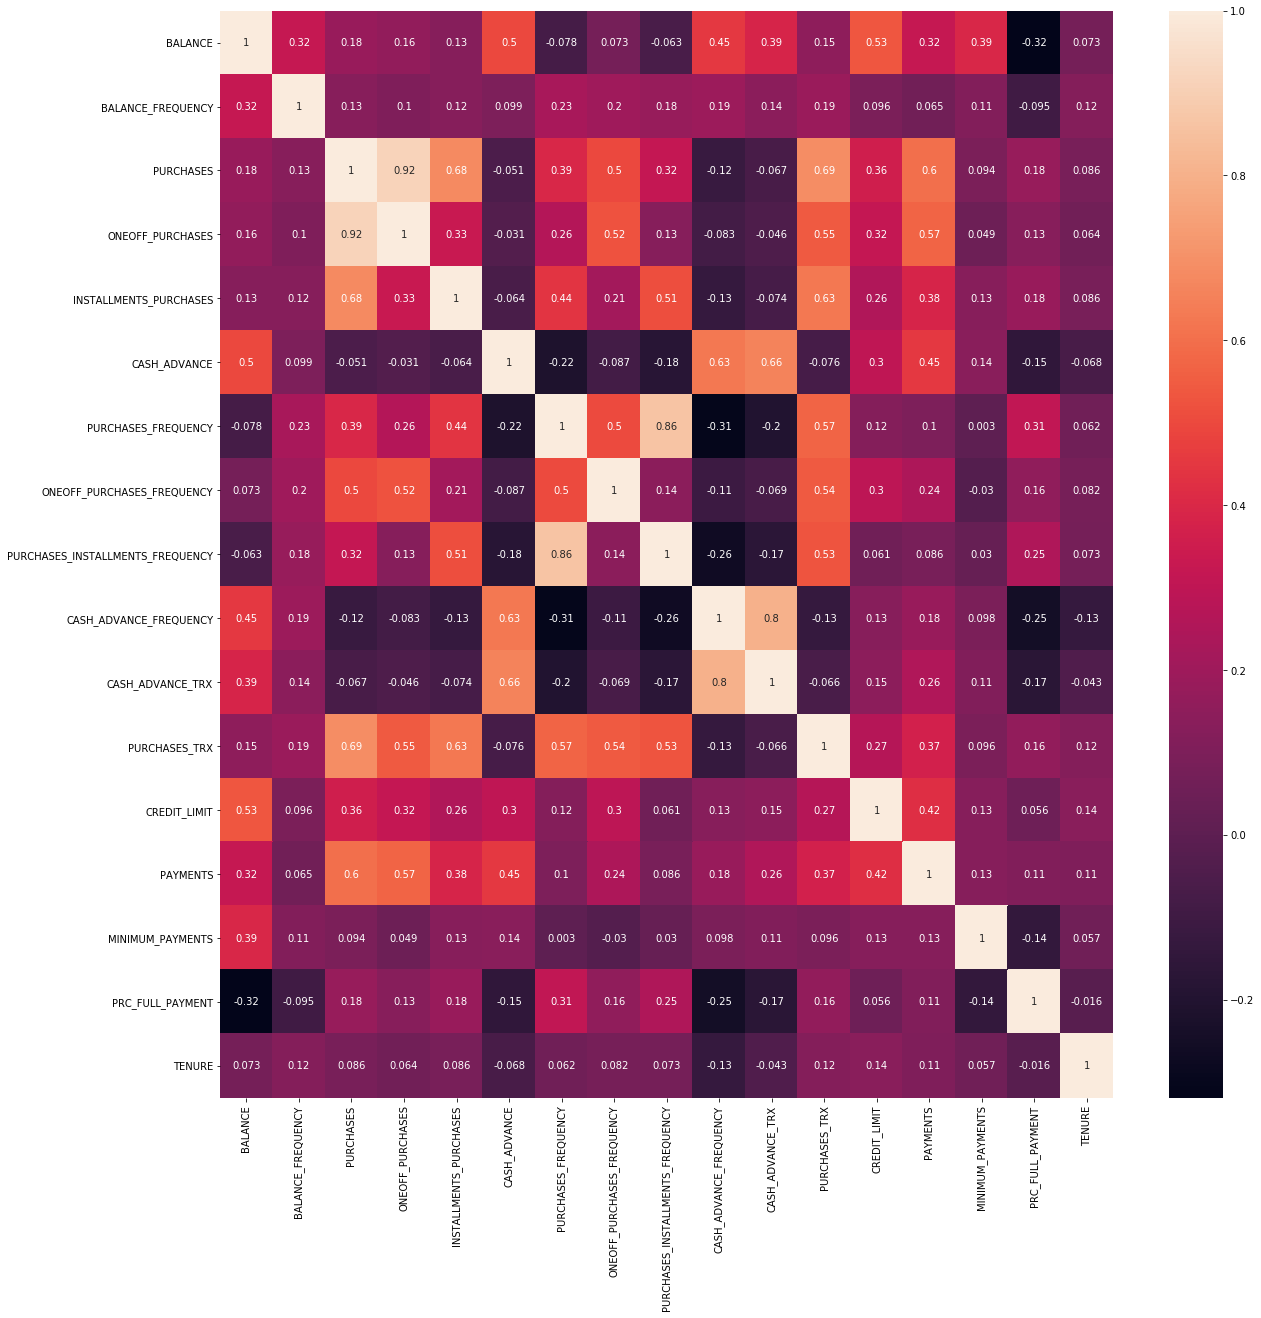

In [12]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
Also, there is a strong positive correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'.

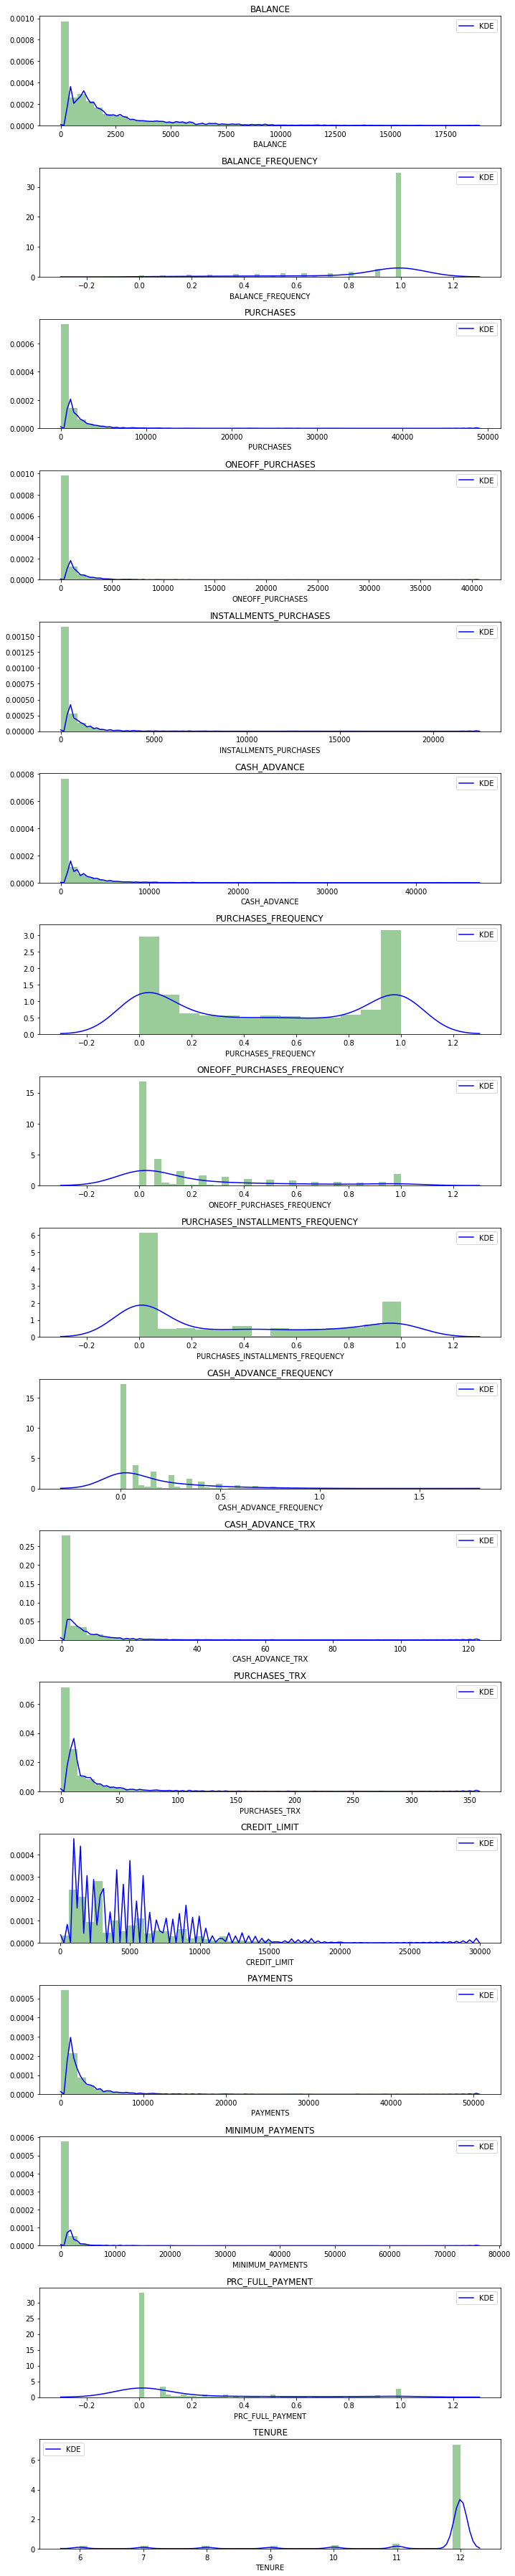

In [13]:
plt.figure(figsize=(10,50))
for i in range(n):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "label": "KDE",'bw': 0.1}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()

### Scale the Data with StandardScaler

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

### Theory behind the K-Means Clustering Algorithm 

K-Means is an unspurvised learning clustering algorithm, and works by grouping some data points together using unlabelled data. <br>The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.

- K-Means Algorithm Steps:
    1. Choose number of cluster 'k'
    2. Select random K points that are going to be the centroids for each cluster
    3. Assign each data points to the nearest centroid to create k number of clusters
    4. Calculate new centroid for each cluster
    5. Reassign each data points to the closest centroid
    6. Go to step 4 and repeat until the algorithm stop

### Find the optimal number of clusters using Elbow Method

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

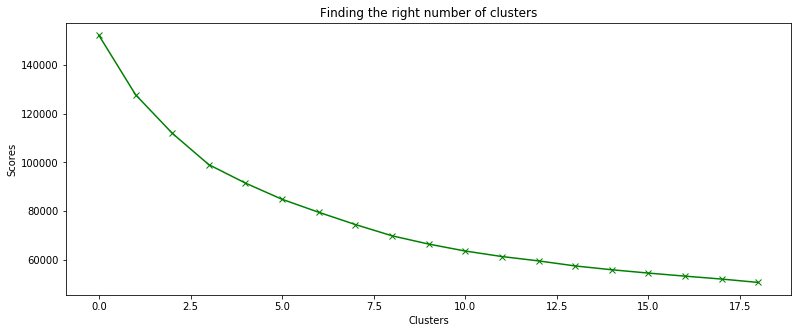

In [15]:
scores_1 = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_) 
    
plt.figure(figsize=(13,5))
plt.plot(scores_1, 'bx-',c='green')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [16]:
clusters_df=pd.DataFrame({'num_clusters':range(1,20),'cluster_errors':scores_1})
clusters_df

,num_clusters,cluster_errors
0,1,152150.000000
1,2,127785.045931
2,3,111986.797811
3,4,99074.247180
4,5,91502.958300
5,6,84852.628650
6,7,79527.791883
7,8,74493.367214
8,9,69875.960207
9,10,66480.147209


### Apply K-Means Method

In [17]:
kmeans = KMeans(n_clusters =8)
kmeans.fit(df_scaled)
kmeans_labels = kmeans.labels_
kmeans_labels.shape, kmeans_labels.max(), kmeans_labels.min()

((8950,), 7, 0)

In [18]:
kmeans.cluster_centers_.shape

(8, 17)

In [19]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers      

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.383920,0.330180,-0.038364,-0.232950,0.337094,-0.372979,0.994940,-0.353821,1.190702,-0.487512,-0.369905,0.176381,-0.279199,-0.227712,-0.038824,0.323931,0.251209
1,1.410946,0.413379,7.127807,6.300978,5.274909,0.010089,1.084767,1.885460,1.038774,-0.294900,-0.112444,4.742082,2.166018,4.905174,1.100473,0.847509,0.333004
2,-0.701818,-2.142406,-0.306745,-0.230212,-0.302238,-0.322301,-0.547790,-0.428995,-0.440847,-0.520061,-0.376559,-0.416529,-0.171052,-0.202047,-0.257268,0.296251,0.202500
3,-0.087724,0.396203,-0.335992,-0.216940,-0.395769,-0.176044,-0.777874,-0.309165,-0.741109,-0.022398,-0.120410,-0.454800,-0.360079,-0.264414,-0.071980,-0.445471,0.276022
4,1.461289,0.413742,-0.281920,-0.206378,-0.287500,1.259710,-0.575893,-0.285813,-0.500939,1.595112,1.320263,-0.330911,0.785312,0.250817,0.571207,-0.449694,0.110641
5,0.139806,0.431766,0.970876,0.912258,0.619617,-0.297071,1.107849,1.878913,0.564904,-0.392027,-0.300555,1.235073,0.711343,0.416140,-0.045526,0.469561,0.304442
6,-0.341083,-0.351188,-0.283802,-0.207836,-0.288847,0.058733,-0.196980,-0.272089,-0.229370,0.291613,-0.014317,-0.385659,-0.560310,-0.391909,-0.210241,0.018958,-3.212142
7,1.802246,0.279563,0.065475,0.049270,0.063928,4.777947,-0.257746,-0.000350,-0.188904,2.494220,4.059728,0.006060,1.409096,3.566288,0.593215,-0.134637,0.024711


In [20]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans[:15]

array([7, 0, 6, 7, 7, 1, 3, 1, 7, 2, 1, 7, 1, 1, 7], dtype=int32)

Concatenate the clusters labels to our original dataframe

In [21]:
df_cluster_kmeans = pd.concat([df, pd.DataFrame({'cluster':kmeans_labels})], axis = 1)
df_cluster_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


### Theory behind the Hierarchical Agglomerative Clustering

Agglomerative Clustering is a bottom-up apprach. It recursively merges the pair of clusters that minimally increases a given linkage distance. The results of hirerachical clustering are usually presented in a dendrogram, which shows sequence of merges and distances. Height of the branches in the 'dendrogram' shows you what is most similar. 
- Distance Metrics 
    1. Euclidean: Continous Data
    2. Manhattan: High Dimensions
    3. Hamming: Categories
    4. Cosine: Word Counts   


- Linkage Criteria
    1. single-linkage: The closest point in each cluster
    2. complete-linkage: The furthest point in each cluster
    2. centroid: The average of each cluster

### Apply Hierarchical Agglomerative Clustering Method

In [22]:
hac=AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward')
hac.fit(df_scaled)
hac_labels = hac.labels_
hac_labels[:5]

array([7, 2, 0, 6, 7])

In [23]:
hac_labels.shape, hac_labels.max(), hac_labels.min()

((8950,), 7, 0)

In [24]:
y_hat = hac.fit_predict(df_scaled)
np.unique(y_hat), y_hat.shape

(array([0, 1, 2, 3, 4, 5, 6, 7]), (8950,))

Retrieve unique clusters

In [25]:
clusters = np.unique(hac_labels)
clusters

array([0, 1, 2, 3, 4, 5, 6, 7])

### Dendrogram for Hierarchical Clustering

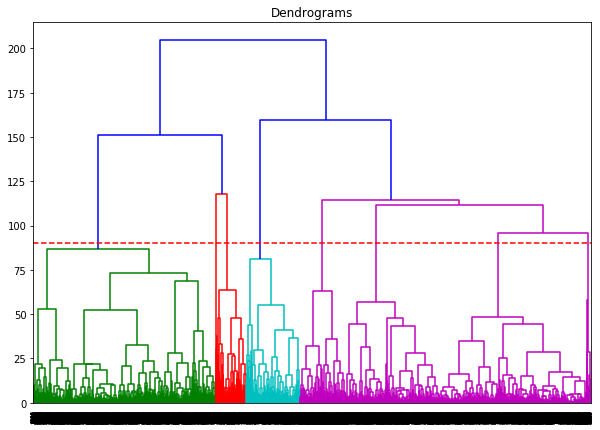

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.axhline(y=90, color='red', linestyle='--')
plt.show()

Concatenate the clusters labels to our original dataframe

In [27]:
df_cluster_hac = pd.concat([df, pd.DataFrame({'cluster':hac_labels})], axis = 1)
df_cluster_hac.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


In [28]:
df_cluster_hac.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1115.777861,0.975988,1329.751709,680.440699,649.478386,422.112009,0.868399,0.338744,0.669564,0.077173,1.842033,23.312863,4441.124655,1532.519529,632.798004,0.236684,11.958376
1,3184.721917,0.989440,5672.306078,3606.399440,2067.199741,369.871576,0.946771,0.746491,0.769221,0.054203,1.084052,78.133621,8785.021552,5137.783379,1430.938438,0.252812,11.950431
2,4733.393046,0.981978,389.403808,264.281863,125.239618,4742.439786,0.204784,0.100882,0.119632,0.495628,15.153935,4.723380,7716.724537,3674.262245,1658.389287,0.031881,11.791667
3,3134.141257,0.988703,508.366316,85.804474,422.561842,731.672553,0.377046,0.030170,0.351262,0.099315,2.750000,13.394737,3334.868421,977.618031,18844.084301,0.003289,11.789474
4,4812.382778,0.956126,27505.339565,22417.452174,5087.887391,1617.786145,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,28138.984873,2599.090939,0.533432,11.913043
5,1084.053860,0.861913,510.836620,284.932285,225.945886,1339.497691,0.502005,0.136134,0.357290,0.219346,3.878116,7.232687,2861.108033,744.422126,402.965792,0.215341,7.789474
6,167.687277,0.443842,311.595918,156.963269,155.304049,397.530376,0.298902,0.061654,0.229861,0.041424,0.870542,4.857332,3366.016876,1147.495809,269.283833,0.204673,11.536328
7,1603.946210,0.972840,255.070959,187.074648,68.186413,676.062501,0.153934,0.073095,0.080634,0.127302,2.417233,2.775467,3684.875495,1046.286765,675.953863,0.025172,11.900255


In [29]:
silhouette_score_AggClustering = silhouette_score(df_scaled, hac_labels, metric='euclidean')
print('Silhouette Score: %.4f' % silhouette_score_AggClustering)

Silhouette Score: 0.1520


### Overview of Principal Component Analysis

PCA is an unsupervised machine learning algorithm, performs dimentionality reduction while attempting at keeping the oringinal information unchanged. It works by trying to find a new set of features called components. Components are composites of the uncorrelated given input features. 

In [30]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68221862, -1.07646054],
       [-1.13828969,  2.50647136],
       [ 0.9696741 , -0.38348663],
       ...,
       [-0.92620228, -1.81080363],
       [-2.33654932, -0.65798275],
       [-0.5564262 , -0.40044148]])

- Create a dataframe with the two components

In [31]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076461
1,-1.138290,2.506471
2,0.969674,-0.383487
3,-0.873624,0.043157
4,-1.599434,-0.688589


- Concatenate the clusters labels to the dataframe

In [32]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':hac_labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076461,7
1,-1.138290,2.506471,2
2,0.969674,-0.383487,0
3,-0.873624,0.043157,6
4,-1.599434,-0.688589,7


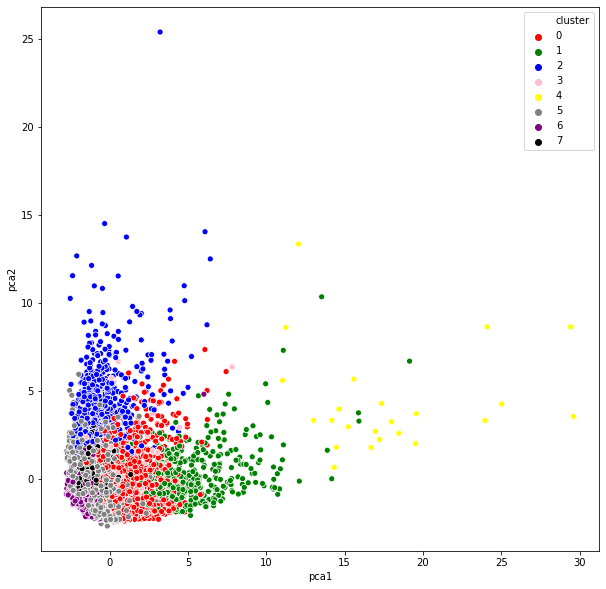

In [33]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, 
                     palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

### Theory behind the AutoEncoders

- AutoEncoders are a type of ANN that are used to perform a task of data encoding (representation learning). <br>
- AutoEncoders use the same input data for the input and output. It works by adding a bottleneck in the network.<br>
- This bottleneck forces the network to create a compressed version of the original input. <br> 
- Autoencoders work well if correlations exists between input data, if all input data is independent it performs poorly.

In [34]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [35]:
encoding_dim = 7

input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [36]:
df_scaled.shape

(8950, 17)

In [37]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 34ms/step - loss: 0.6010
Epoch 2/25
70/70 [==============================] - 3s 36ms/step - loss: 0.3210
Epoch 3/25
70/70 [==============================] - 3s 39ms/step - loss: 0.2446
Epoch 4/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1974
Epoch 5/25
70/70 [==============================] - 3s 36ms/step - loss: 0.1764
Epoch 6/25
70/70 [==============================] - 3s 45ms/step - loss: 0.1598
Epoch 7/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1390
Epoch 8/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1245
Epoch 9/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1176
Epoch 10/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1129
Epoch 11/25
70/70 [==============================] - 3s 44ms/step - loss: 0.0973
Epoch 12/25
70/70 [==============================] - 5s 68ms/step - loss: 0.0933
Epoch 13/25
70/70 [==================

In [38]:
autoencoder.save_weights('autoencoder.h5')

In [39]:
pred = encoder.predict(df_scaled)
pred.shape

(8950, 10)

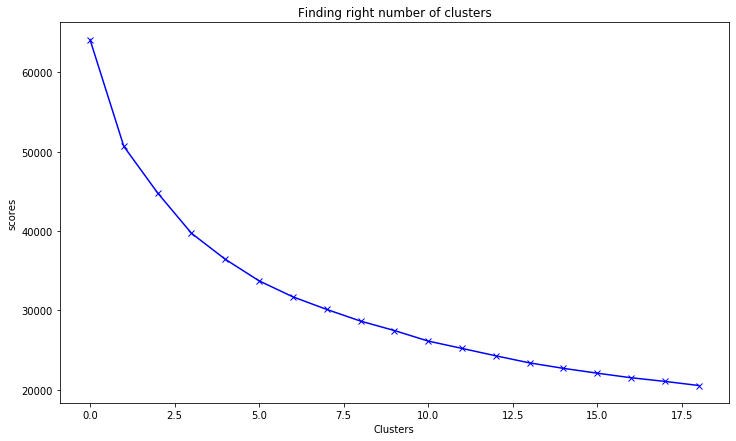

In [40]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.figure(figsize=(12,7))
plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

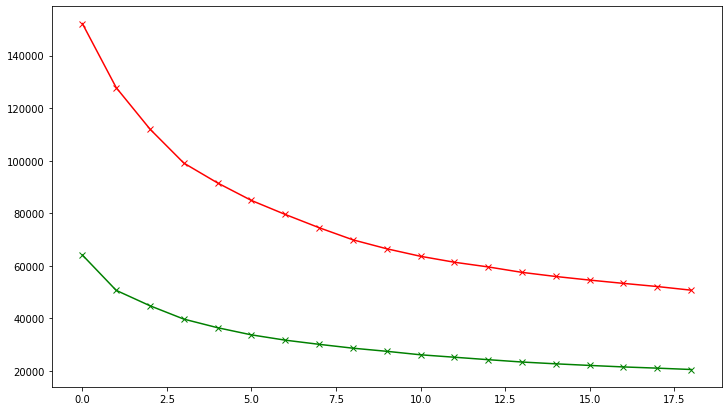

In [41]:
plt.figure(figsize=(12,7))
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

#### Cluster Customers using pred dataframe with 10 features obtained from encoder by dividing customers into four distinctive groups. 

In [42]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

In [43]:
df_cluster_en = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_en.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [44]:
grouped_customers = df_cluster_en.groupby(['cluster']).mean().round(1)
grouped_customers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1203.1,0.9,613.4,392.2,221.5,507.9,0.4,0.2,0.3,0.1,2.1,9.6,3260.9,1021.0,622.3,0.0,11.8
1,5470.1,1.0,9753.6,6436.9,3316.8,3851.5,0.9,0.7,0.8,0.2,8.0,100.9,12672.9,13183.4,3661.3,0.3,11.8
2,3621.7,0.8,499.4,316.8,182.6,3401.3,0.2,0.1,0.2,0.4,10.6,6.8,7080.5,2815.8,1813.1,0.0,10.6
3,598.0,0.8,1686.6,826.1,861.1,140.1,0.8,0.3,0.7,0.0,0.4,27.5,5223.6,1828.3,540.2,0.5,11.3


In [45]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df_en = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df_en.head()

,pca1,pca2
0,-1.462282,0.241670
1,1.198550,1.717449
2,-0.597169,-0.347719
3,-0.029485,0.527539
4,-1.562914,0.189954


In [46]:
pca_df_en = pd.concat([pca_df_en, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df_en.head()

,pca1,pca2,cluster
0,-1.462282,0.241670,0
1,1.198550,1.717449,2
2,-0.597169,-0.347719,0
3,-0.029485,0.527539,0
4,-1.562914,0.189954,0


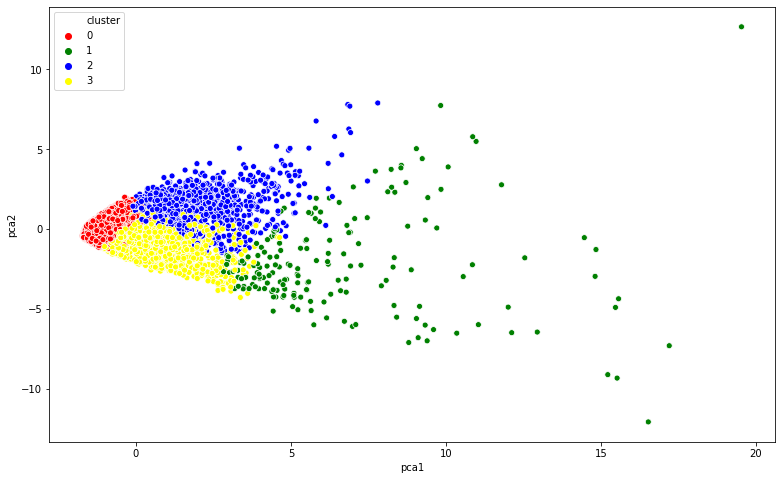

In [47]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df_en, palette =['red','green','blue','yellow'])
plt.show()

# THE END

# THANK YOU FOR READING 